In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv('datasets_156197_358170_Churn_Modelling.csv')

In [32]:
df.shape

(10000, 14)

##### This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

In [33]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Checking whether there is any missing values in the dataset

In [34]:
df.isnull().sum() 

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### EDA

In [35]:
#Checking the relation between the features and target label

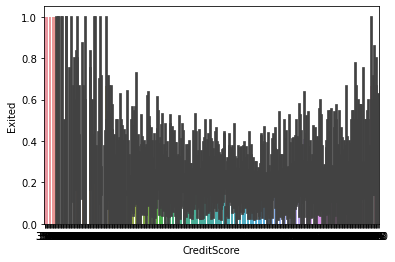

In [36]:
sns.barplot(df['CreditScore'],df['Exited'])

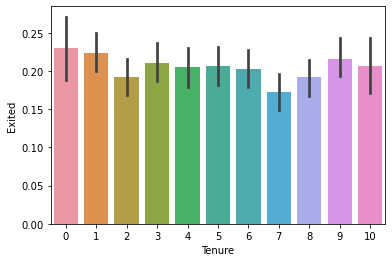

In [37]:
sns.barplot(df['Tenure'],df['Exited'])

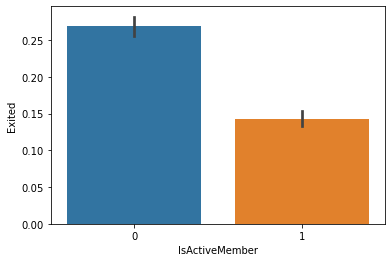

In [40]:
sns.barplot(df['IsActiveMember'],df['Exited'])

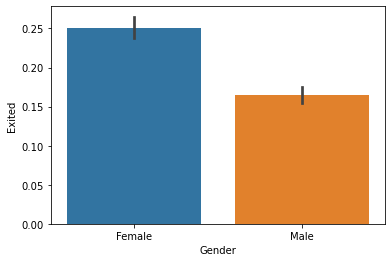

In [41]:
sns.barplot(df['Gender'],df['Exited'])

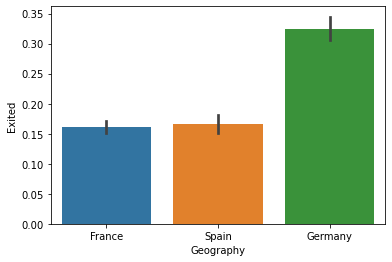

In [42]:
sns.barplot(df['Geography'],df['Exited'])

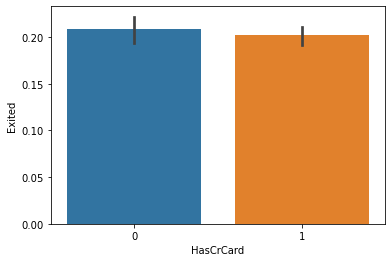

In [43]:
sns.barplot(df['HasCrCard'],df['Exited'])

In [44]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)     #Dropping unnecessary features

In [45]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
df['Geography'].value_counts()   

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [47]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [48]:
df['Gender']=df['Gender'].replace({'Female':0,'Male':1})

In [49]:
df['Geography']=df['Geography'].replace({'France':0,'Spain':1,'Germany':2})

In [50]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4404,604,1,1,43,2,145081.72,1,1,1,23881.62,0
6592,685,0,0,33,6,0.00,2,0,1,186785.01,0
5240,597,0,0,24,1,103219.47,1,1,0,60420.07,0
6646,685,1,0,42,2,0.00,2,0,0,199992.48,0
8266,560,0,0,35,1,0.00,2,1,0,3701.63,0


### Fetching X and y

In [51]:
X=df.iloc[:,0:-1].values
y=df.iloc[:,-1].values

In [52]:
print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


### Train_test_split

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

### Applying DecisionTreeClassifier 

In [54]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [55]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [56]:
y_pred=clf.predict(X_test)

### Accuracy_score

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7945

### Now applying GridSearchCV

In [58]:
param_dict={  'criterion': ['gini','entropy'],
               'max_depth' : [1,2,3,4,5,6,7,8,None],
                'random_state':[1,2,3,4,5,6,7,8,None]
    
}

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
grid=GridSearchCV(clf,param_grid=param_dict,cv=15,n_jobs=-1)

In [61]:
grid.fit(X_train,y_train)

GridSearchCV(cv=15, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, None],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, None]})

In [62]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=6, random_state=4)

In [63]:
grid.best_score_

0.8589961422518287